# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

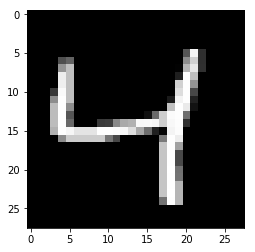

In [7]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [9]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name="inputs")
targets_ = tf.placeholder(tf.float32, (None, image_size), name="targets")

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)
# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [11]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6948
Epoch: 1/20... Training loss: 0.6922
Epoch: 1/20... Training loss: 0.6896
Epoch: 1/20... Training loss: 0.6868
Epoch: 1/20... Training loss: 0.6831
Epoch: 1/20... Training loss: 0.6790
Epoch: 1/20... Training loss: 0.6737
Epoch: 1/20... Training loss: 0.6669
Epoch: 1/20... Training loss: 0.6594
Epoch: 1/20... Training loss: 0.6506
Epoch: 1/20... Training loss: 0.6401
Epoch: 1/20... Training loss: 0.6287
Epoch: 1/20... Training loss: 0.6169
Epoch: 1/20... Training loss: 0.6013
Epoch: 1/20... Training loss: 0.5867
Epoch: 1/20... Training loss: 0.5701
Epoch: 1/20... Training loss: 0.5496
Epoch: 1/20... Training loss: 0.5345
Epoch: 1/20... Training loss: 0.5189
Epoch: 1/20... Training loss: 0.4978
Epoch: 1/20... Training loss: 0.4837
Epoch: 1/20... Training loss: 0.4651
Epoch: 1/20... Training loss: 0.4462
Epoch: 1/20... Training loss: 0.4319
Epoch: 1/20... Training loss: 0.4147
Epoch: 1/20... Training loss: 0.3998
Epoch: 1/20... Training loss: 0.3881
E

Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1838
Epoch: 1/20... Training loss: 0.1854
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1976
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1834
Epoch: 1/20... Training loss: 0.1823
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1854
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1863
E

Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1607
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1630
Epoch: 2/20... Training loss: 0.1621
Epoch: 2/20... Training loss: 0.1611
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1609
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1644
Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1549
E

Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1375
E

Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1221
E

Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1129
Epoch: 4/20... Training loss: 0.1124
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1111
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1153
E

Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1043
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1038
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1083
E

Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1063
E

Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1034
E

Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0959
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0952
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0996
E

Epoch: 8/20... Training loss: 0.0938
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0932
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.1027
E

Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0980
E

Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.1008
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.1000
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0882
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0994
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0893
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0990
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0991
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0887
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0889
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0981
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0893
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0979
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0891
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0982
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0972
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

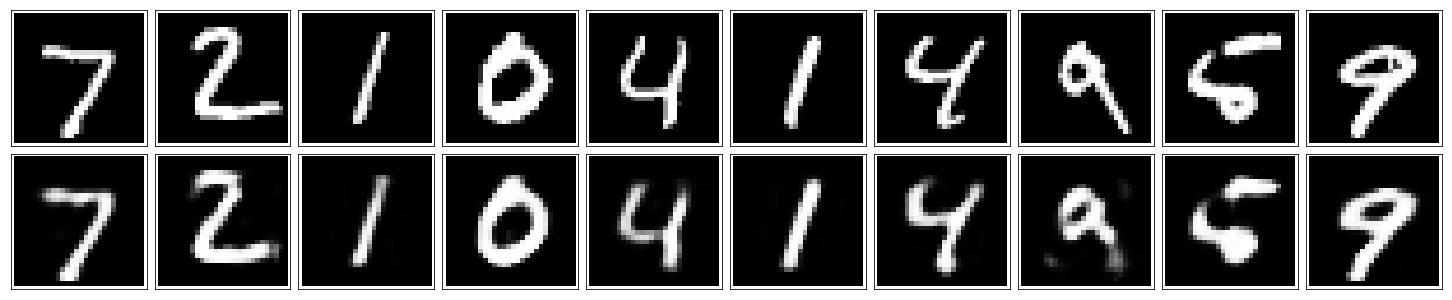

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [13]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.